第八章 形态学操作

形态学主要从图像内提取分量信息，该分量信息通常对于表达和描绘图像的形状具有重要意义，通常是图像理解时所使用的最本质的形状特征。

In [1]:
#cv2.erode() 实现腐蚀操作，其语法格式为：
#dst = cv2.erode(src,kernel[,anchor[,iterations[,borderType[,borderValue]]]])
#dst : 腐蚀后所输出的目标图像，该图像和原始图像有同样的类型和大小
#src : 需要进行腐蚀的延时图像，通道数随意，但深度必须是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
#kernel : 代表腐蚀操作是所采用的结构类型，可以自定义生成，也可以通过函数cv2.getStructuringElement()生成
#anchor : element结构中锚点的位置，一般认为是（-1,-1），在核的中心位置
#iterations: 腐蚀操作迭代的次数，默认是1

import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)

In [2]:
img = np.zeros((5,5),np.uint8)
img[1:4,1:4] = 1
kernel = np.ones((3,1),np.uint8)
erosion = cv2.erode(img,kernel)
print("img = \n",img)
print("kernel = \n",kernel)
print("erosion = \n",erosion)


img = 
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
kernel = 
 [[1]
 [1]
 [1]]
erosion = 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


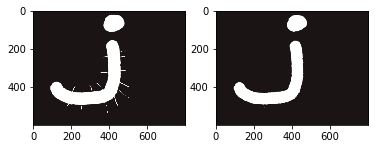

In [5]:
o = cv2.imread("erode.bmp")
#print(o)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(o,kernel)
plt.subplot(1,2,1)
show(o)
plt.subplot(1,2,2)
show(erosion)
#cv2.imshow("original",o)
#cv2.imshow("erosion",erosion)
#cv2.waitKey()
#cv2.destroyAllWindows()

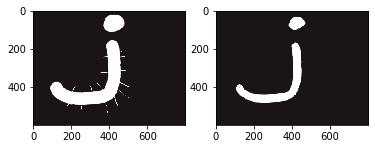

In [6]:
o = cv2.imread("erode.bmp",-1)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(o,kernel,iterations =5)
plt.subplot(1,2,1)
show(o)
plt.subplot(1,2,2)
show(erosion)

膨胀操作
膨胀操作与腐蚀操作相反
膨胀操作能对图像的边界进行扩张，当两个对象离得较近时，膨胀操作可能会将两个对象连通。

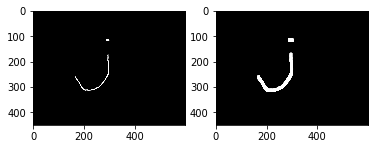

In [7]:
#cv2.dilate()实现对图像的膨胀操作
#dst = cv2.dilate(src,kernel[,anchor[,iterations[,borderType[,borderValue]]]])
#参数的意义与cv2.erode()中的相同
o = cv2.imread("dilation.bmp",-1)
kernel = np.ones((9,9),np.uint8)
dilation = cv2.dilate(o,kernel)
plt.subplot(1,2,1)
show(o)
plt.subplot(1,2,2)
show(dilation)

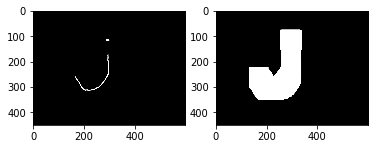

In [8]:
#膨胀九次
o = cv2.imread("dilation.bmp",-1)
kernel = np.ones((9,9),np.uint8)
dilation = cv2.dilate(o,kernel,iterations = 9)
plt.subplot(1,2,1)
show(o)
plt.subplot(1,2,2)
show(dilation)

腐蚀操作和膨胀操作是形态学运算的基础，将腐蚀和膨胀操作结合起来，就可以实现别的运算。例如：开运算、闭运算、形态学梯度（Morphological Gradient）运算、礼帽运算、黑帽运算、击中击不中等多种不同形式的运算。
cv2.morphologyEx() 可用于实现上述功能，语法格式如下
cv2.morphologyEx(src,op,kernel[,anchor[,iterations[,borderType[,borderValue]]]])
src代表需要处理的原始图像
op代表操作类型
    类型            说明              含义            操作
    cv2.MORPH_ERODE     腐蚀             腐蚀            erode(src)
    cv2.MORPH_DILATE     膨胀            膨胀            dilate(src)
    cv2.MORPH_OPEN      开运算          先腐蚀后膨胀       dilate(erode(src))
    cv2.MORPH_CLOSE     闭运算          先膨胀后腐蚀       erode(dilate(src))
    cv2.MORPH_GRADIENT   形态学梯度运算     膨胀-腐蚀        dilate(src)-erode(src)
    cv2.MORPH_TOPHAT    顶帽运算          原始-开运算       src-open(src) = src-dilate(erode(src))
    cv2.MORPH_BLACKHAT   黑帽运算         闭运算-原始       erode(dilate(src)) - src
    cv2.MORPH_HITMISS    击中击不中        前景背景腐蚀运算的交集     intersection(erode(src),erode(src))
                                仅仅支持CV_8UC1二进制图像

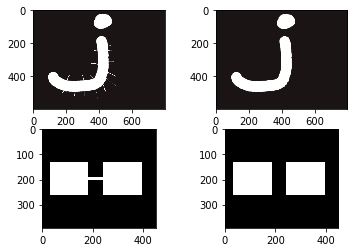

In [11]:
#开运算，用于去除前景物体周围的噪声
#cv2.morphologyEx(src,cv2.MORPH_OPEN,kernel)
img1 = cv2.imread("opening.bmp",-1)
img2 = cv2.imread("opening2.bmp",-1)
kernel = np.ones((10,10),np.uint8)
op1 = cv2.morphologyEx(img1,cv2.MORPH_OPEN,kernel)
op2 = cv2.morphologyEx(img2,cv2.MORPH_OPEN,kernel)
plt.subplot(2,2,1)
show(img1)
plt.subplot(2,2,2)
show(op1)
plt.subplot(2,2,3)
show(img2)
plt.subplot(2,2,4)
show(op2)

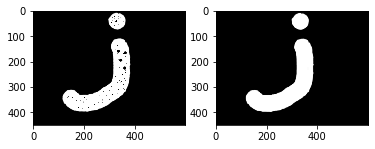

In [12]:
#闭运算,可用于去除前景物体内部的杂质
#cv2.morphologyEx(src,cv2.MORPH_CLOSE,kernel)
img1 = cv2.imread("closing.bmp",-1)
kernel = np.ones((10,10),np.uint8)
close1 = cv2.morphologyEx(img1,cv2.MORPH_CLOSE,kernel)
plt.subplot(1,2,1)
show(img1)
plt.subplot(1,2,2)
show(close1)

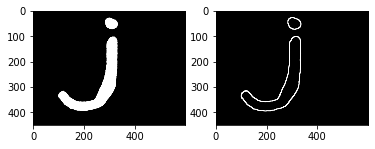

In [14]:
#形态学梯度运算,用于获取前景图像的边缘
#result = cv2.morphologyEx(src,cv2.MORPH_GRADIENT,kernel)
o = cv2.imread("gradient.bmp",-1)
kernel = np.ones((5,5),np.uint8)
r = cv2.morphologyEx(o,cv2.MORPH_GRADIENT,kernel)
plt.subplot(1,2,1)
show(o)
plt.subplot(1,2,2)
show(r)

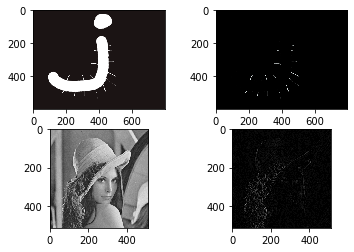

In [15]:
#礼貌运算，用于获取图像的噪声信息，一般情况下，获取的噪声是在背景中的，即外部噪声
#result = cv2.morphologyEx(src,cv2.MORPH_TOPHAT,kernel)
o1 = cv2.imread("tophat.bmp",-1)
o2 = cv2.imread("lena.bmp",-1)
kernel = np.ones((5,5),np.uint8)
r1 = cv2.morphologyEx(o1,cv2.MORPH_TOPHAT,kernel)
r2 = cv2.morphologyEx(o2,cv2.MORPH_TOPHAT,kernel)
plt.subplot(2,2,1)
show(o1)
plt.subplot(2,2,2)
show(r1)
plt.subplot(2,2,3)
show(o2)
plt.subplot(2,2,4)
show(r2)

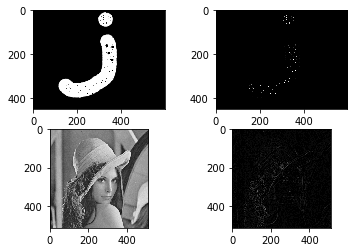

In [16]:
#黑帽运算，可用于获取图像内部的小孔（噪声），或前景中的小黑点，或者获得比原始图像边缘更暗的边缘部分
#下例中获取了内部的噪声
# result = cv2.morphologyEx(src,cv2.MORPH_BLACKHAT,kernel)
o1 = cv2.imread("blackhat.bmp",-1)
o2 = cv2.imread("lena.bmp",-1)
kernel = np.ones((5,5),np.uint8)
r1 = cv2.morphologyEx(o1,cv2.MORPH_BLACKHAT,kernel)
r2 = cv2.morphologyEx(o2,cv2.MORPH_BLACKHAT,kernel)
plt.subplot(2,2,1)
show(o1)
plt.subplot(2,2,2)
show(r1)
plt.subplot(2,2,3)
show(o2)
plt.subplot(2,2,4)
show(r2)

#核函数
#在进行形态学操作时，有时必须用到特定的核（结构元）
#cv2.getStructuringElement() 可以获取特定的核，语法结构如下
#retval = cv2.getStructuringElement(shape,ksize[,anchor])
#shape : 代表形状，
        cv2.MORPH_RECT    矩形，所有元素都是1
        cv2.MORPH_CROSS   交叉型，对角线为1，其余为0
        cv2.MORPH_ELLIPSE  椭圆型(下面有个示例)
ksize : 结构元素大小
anchor: 锚点，默认为（-1,-1），只有交叉型会对锚点位置有要求
PS：除了上述类型之外，也可以用自定义的二进制掩码作为结构元素

In [17]:
#椭圆型结构元
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
print("kernel = \n",kernel)

kernel = 
 [[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


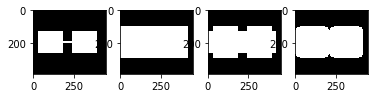

In [19]:
#观察不同核对形态学操作的影响
o = cv2.imread("kernel.bmp",-1)
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(59,59))
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(59,59))
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(59,59))
dst1 = cv2.dilate(o,kernel1)
dst2 = cv2.dilate(o,kernel2)
dst3 = cv2.dilate(o,kernel3)
plt.subplot(1,4,1)
show(o)
plt.subplot(1,4,2)
show(dst1)
plt.subplot(1,4,3)
show(dst2)
plt.subplot(1,4,4)
show(dst3)

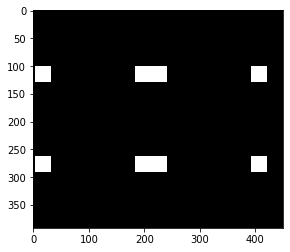

In [21]:
test = dst1-dst2;
show(test)